# Unit 5 - Financial Planning

In [17]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [18]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [19]:
# Set current amount of crypto assets
current_crypto_data = {
    "crypto": [1.2, 5.3]
}
tickers = ["BTC", "ETH"]
df_crypto_data = pd.DataFrame(current_crypto_data, index=tickers)
df_crypto_data.head()

my_btc = 1.2
my_eth = 5.3

In [20]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [21]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url)
btcprice=btc_response_data.json()["data"]["1"]["quotes"]["USD"]["price"]
btcprice
# Fetch current ETH price
eth_response_data = requests.get(eth_url)
ethprice=eth_response_data.json()["data"]["1027"]["quotes"]["USD"]["price"]
ethprice

# Compute current value of my crpto
btc_value = my_btc*btcprice
eth_value = my_eth*ethprice
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth:0.2f}")

The current value of your 1.2 BTC is $1.20
The current value of your 5.3 ETH is $5.30


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [22]:
# Set current amount of shares
my_agg = 200  
my_spy = 50

In [23]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [24]:
# Format current date as ISO format
today = pd.Timestamp("2023-03-27", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
closing_price_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=today,
    end=today,
).df

# Reorganize the DataFrame
# Separate ticker data
agg_data = closing_price_data[closing_price_data['symbol']=="AGG"].drop('symbol', axis=1)
spy_data = closing_price_data[closing_price_data['symbol']=="SPY"].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
closing_price_data = pd.concat([agg_data, spy_data], axis=1, keys=['AGG', 'SPY'])

# Preview DataFrame
closing_price_data.head()

AGG                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2023-03-27 04:00:00+00:00  99.39  99.52  99.07  99.08  6807253       27484   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2023-03-27 04:00:00+00:00  99.252867  398.12  398.92  395.56  396.49   

                                                            
                             volume trade_count       vwap  
timestamp                                                   
2023-03-27 04:00:00+00:00  73308620      562868  396.93555

In [25]:
# Pick AGG and SPY close prices
agg_close_price = closing_price_data['AGG']['close'][0]
spy_close_price = closing_price_data['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.08
Current SPY closing price: $396.49


In [26]:
# Compute the current value of shares
my_agg_value = my_agg*agg_close_price
my_spy_value = my_spy*spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19824.50
The current value of your 200 AGG shares is $19816.00


### Savings Health Analysis

In [33]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_data = btc_value+eth_value
stocks_bond_data = my_agg_value+my_spy_value
savings_data = [crypto_data, stocks_bond_data]

# Create savings DataFrame
df_savings = pd.DataFrame({'amount':savings_data}, index=['crypto_data', 'stocks_bond_data'])

# Display savings DataFrame
display(df_savings)

,amount
crypto_data,41495.371
stocks_bond_data,39640.500


<AxesSubplot:ylabel='Savings Distribution'>

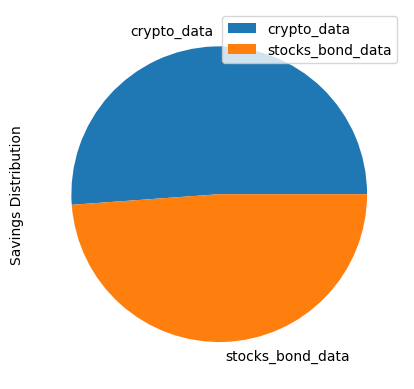

In [34]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', ylabel="Savings Distribution")

In [36]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_data+stocks_bond_data
# Validate saving health
if total_savings > emergency_fund:
    print("Congrats, you have enough savings in this fund for an emergency situation.")
elif total_savings == emergency_fund:
    print("You have enough in savings, but not for emergency.")
else:
    print(f"You are ${emergency_fund-total_savings:0.2f} away from reaching your emergency savings goal.")

Congrats, you have enough savings in this fund for an emergency situation.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [37]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [40]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

# Reorganize the DataFrame
# Separate ticker data
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
).df
agg_historical_data = df_stock_data[df_stock_data['symbol']=="AGG"].drop('symbol', axis=1)
spy_historical_data = df_stock_data[df_stock_data['symbol']=="SPY"].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg_historical_data, spy_historical_data], axis=1, keys=['AGG', 'SPY'])

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [41]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500
num_days = 252*30
weights = [0.4, 0.6]

mc_stocks = MCSimulation(
    portfolio_data=df_stock_data,
    weights=weights,
    num_simulation=num_sims,
    num_trading_days=num_days
)

In [42]:
# Printing the simulation input data
print(f"Bonds/stocks weighting: {weights[0]*100}%/{weights[1]*100}%")
print(f"Number of simulations: {num_sims}")
print(f"Number of trading days: {num_days}")

Bonds/stocks weighting: 40.0%/60.0%
Number of simulations: 500
Number of trading days: 7560


In [43]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\sagui\ASU-VIRT-FIN-PT-02-2023-U-LOLC\02-Homework\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001026,0.990954,0.993465,0.993958,1.004885,1.008291,0.992772,1.012829,1.005108,1.002557,...,1.002278,1.004974,0.998274,1.015228,1.006139,1.005802,1.005051,0.993399,1.004334,0.989992
2,0.998692,0.979146,0.998191,0.991126,1.014710,1.007323,0.995070,1.022776,1.016214,1.011325,...,0.989758,1.010793,1.000213,1.024960,1.007259,1.004190,1.016000,0.984461,1.004088,0.988906
3,0.993264,0.984127,1.004565,0.987024,1.014829,1.013731,0.999578,1.030248,1.013828,1.018809,...,0.998007,0.999458,0.997712,1.035160,1.013453,0.995487,1.010930,0.984033,1.015740,0.990518
4,1.007269,0.993516,1.001109,0.990487,1.014202,1.016094,0.996402,1.021852,1.010773,1.010494,...,0.995563,1.004886,0.998008,1.030166,1.006210,0.989004,1.005361,0.983352,1.014393,1.001456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.291773,13.353682,6.885283,12.460389,10.969450,12.752805,22.330325,19.641860,22.293306,11.632220,...,4.607155,17.552976,11.025548,13.101410,17.078298,8.486263,34.892710,10.933675,14.001213,17.202017
7557,9.356274,13.298863,6.865415,12.425918,11.047557,12.722036,22.301887,19.761139,22.249866,11.665905,...,4.550197,17.527165,10.950657,13.231490,17.236616,8.383445,35.204117,10.860539,14.103832,17.565081
7558,9.431107,13.166331,6.932007,12.354339,10.899397,12.762571,22.255709,19.626732,22.218414,11.733796,...,4.545307,17.474023,11.043938,13.270544,17.304310,8.417246,35.484499,10.876627,14.208118,17.680441
7559,9.456421,13.224477,6.966272,12.277194,10.854519,12.821595,22.332970,19.686101,22.131830,11.655836,...,4.554594,17.519255,10.986160,13.312606,17.408188,8.454111,35.426917,10.830634,14.143110,17.407058


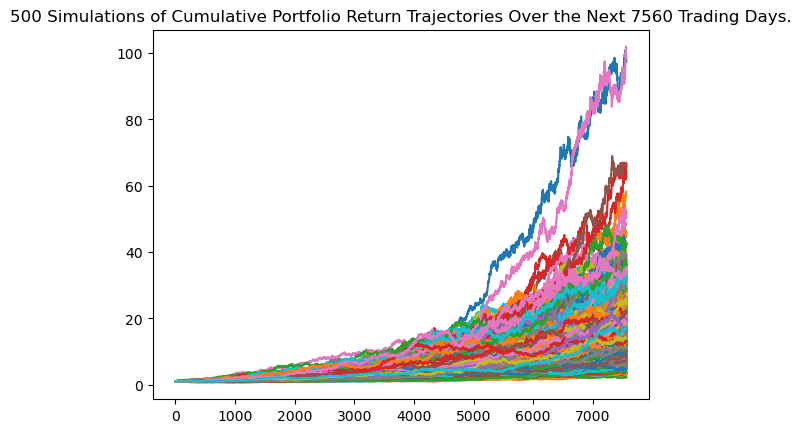

In [44]:
# Plot simulation outcomes
sim_line_plot = mc_stocks.plot_simulation()

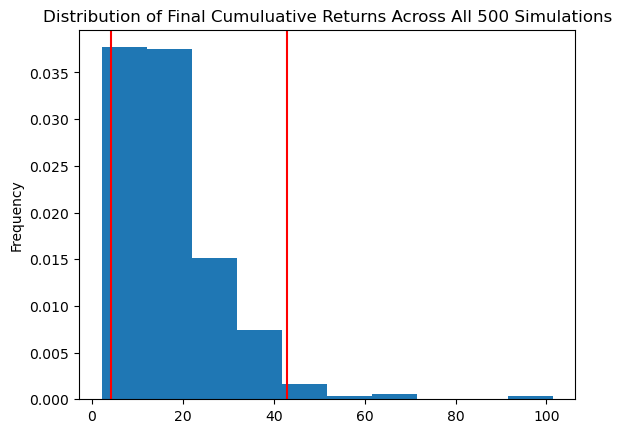

In [46]:
# Plot probability distribution and confidence intervals
sim_dist_plot = mc_stocks.plot_distribution()

### Retirement Analysis

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
sim_summary_stats = mc_stocks.summarize_cumulative_return()

# Print summary statistics
print(sim_summary_stats)

count           500.000000
mean             17.509048
std              11.431740
min               2.139988
25%               9.710537
50%              14.743467
75%              22.077601
max             101.362022
95% CI Lower      4.178876
95% CI Upper     42.931722
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [71]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sim_summary_stats[8]*initial_investment, 2)
ci_upper = round(sim_summary_stats[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $83577.51 and $858634.43


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [72]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(sim_summary_stats[8]*initial_investment, 2)
ci_upper = round(sim_summary_stats[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $125366.27 and $1287951.65


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [73]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims_five_year = 500
num_days_five_year = 252*5
weights_five_year = [0.6, 0.4]

mc_stocks_five_year = MCSimulation(
    portfolio_data=df_stock_data,
    weights=weights_five_year,
    num_simulation=num_sims_five_year,
    num_trading_days=num_days_five_year
)

In [74]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
ci_lower = round(sim_summary_stats[8]*initial_investment, 2)
ci_upper = round(sim_summary_stats[9]*initial_investment, 2)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

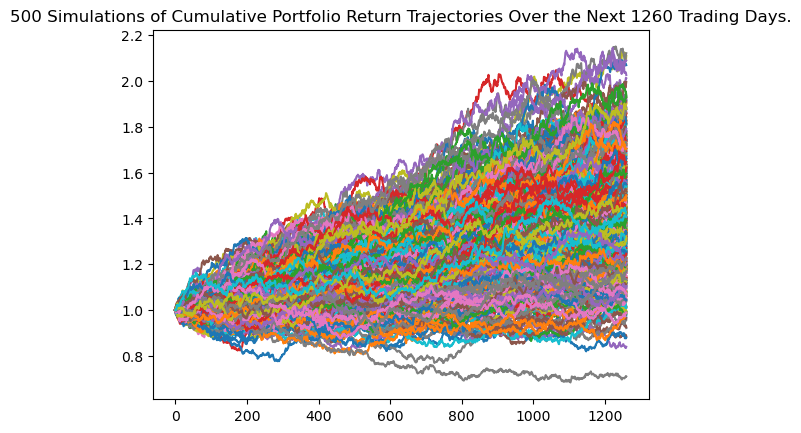

In [75]:
# Plot simulation outcomes
sim_line_plot = mc_stocks_five_year.plot_simulation()

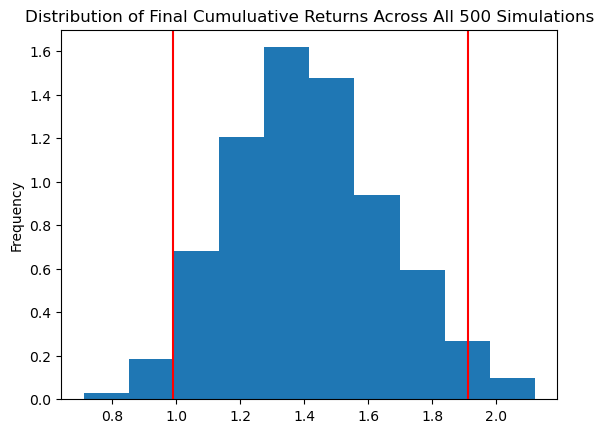

In [76]:
# Plot probability distribution and confidence intervals
sim_dist_plot = mc_stocks_five_year.plot_distribution()

In [77]:
# Fetch summary statistics from the Monte Carlo simulation results
sim_summary_stat = mc_stocks_five_year.summarize_cumulative_return()

# Print summary statistics
print(sim_summary_stat)

count           500.000000
mean              1.411216
std               0.241749
min               0.710936
25%               1.246905
50%               1.396939
75%               1.567095
max               2.120279
95% CI Lower      0.988606
95% CI Upper      1.912421
Name: 1260, dtype: float64


In [78]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(sim_summary_stat[8]*initial_investment, 2)
ci_upper_five = round(sim_summary_stat[9]*initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $59316.34 and $114745.24


### Ten Years Retirement Option

In [80]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims_ten_year = 500
num_days_ten_year = 252*10
weights_ten_year = [0.2, 0.8]

mc_stocks_ten_year = MCSimulation(
    portfolio_data=df_stock_data,
    weights=weights_ten_year,
    num_simulation=num_sims_ten_year,
    num_trading_days=num_days_ten_year
)

In [81]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_stocks_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005848,0.985667,0.996481,1.005090,0.999172,0.993525,0.992460,1.007298,0.994716,0.993158,...,0.999569,1.008762,0.992404,0.999283,0.989633,1.009594,1.025554,0.992301,1.001396,0.997193
2,0.993331,0.978932,1.002839,1.010300,1.006704,0.990777,0.981460,1.008721,1.000241,0.995203,...,0.999052,1.014896,1.007539,0.993553,0.992439,0.993225,1.018804,0.987090,0.976482,1.008476
3,0.996690,0.980999,1.002450,1.023125,1.004053,0.973978,0.981497,1.003048,1.003622,0.993169,...,1.009280,0.999605,1.018185,0.996637,0.982617,0.972640,1.016110,0.990581,0.978052,1.025452
4,1.001627,0.988000,1.008683,1.024048,0.997241,0.985685,0.991717,1.005093,0.993281,0.990476,...,1.008655,0.997284,1.029684,0.992962,0.986541,0.985680,1.022198,0.993999,0.973506,1.010444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.557378,3.337541,2.299127,2.175565,3.576639,1.938342,2.310998,4.339439,4.484071,3.696303,...,3.165840,2.730084,4.639163,3.473043,3.071957,5.148004,3.287392,3.160883,3.371994,2.929414
2517,1.565812,3.334249,2.297899,2.133913,3.605004,1.936824,2.295932,4.433023,4.478002,3.694118,...,3.224326,2.727464,4.556484,3.477448,3.077050,5.220304,3.315298,3.194966,3.425775,2.940845
2518,1.567342,3.292898,2.293665,2.139933,3.614973,1.936299,2.287264,4.434273,4.458260,3.692927,...,3.258581,2.688112,4.509018,3.405585,3.110164,5.257112,3.304928,3.203361,3.434103,2.922865
2519,1.543122,3.258172,2.308442,2.104805,3.657241,1.969526,2.285269,4.429351,4.391085,3.699101,...,3.252730,2.703975,4.544766,3.389053,3.052060,5.326005,3.268081,3.212047,3.443566,2.870509


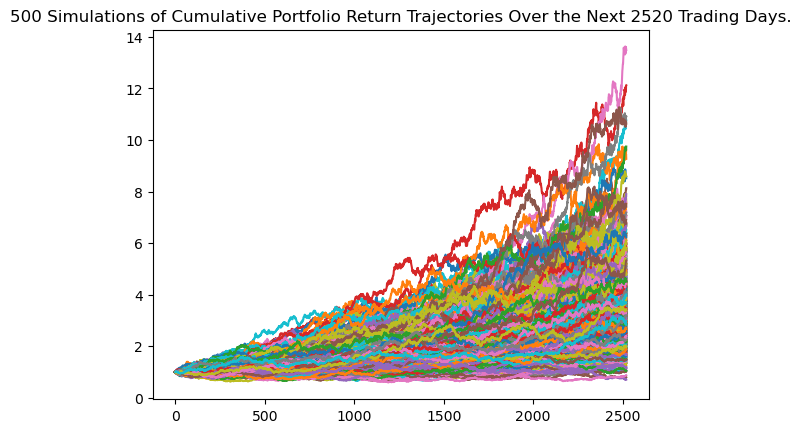

In [82]:
# Plot simulation outcomes
sim_line_plot_ten_year = mc_stocks_ten_year.plot_simulation()

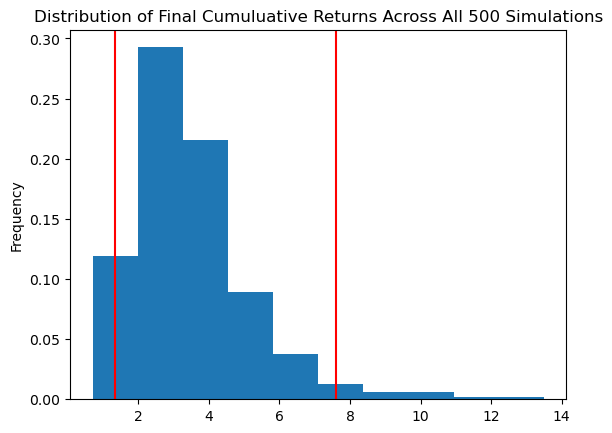

In [83]:
# Plot probability distribution and confidence intervals
sim_dist_plot_ten_year = mc_stocks_ten_year.plot_distribution()

In [84]:
# Fetch summary statistics from the Monte Carlo simulation results
sim_summary_stats_ten_year = mc_stocks_ten_year.summarize_cumulative_return()

# Print summary statistics
print(sim_summary_stats_ten_year)

count           500.000000
mean              3.520900
std               1.720980
min               0.710963
25%               2.371098
50%               3.206862
75%               4.223749
max              13.489266
95% CI Lower      1.343340
95% CI Upper      7.593781
Name: 2520, dtype: float64


In [86]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(sim_summary_stats_ten_year[8]*initial_investment, 2)
ci_upper_ten = round(sim_summary_stats_ten_year[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $80600.39 and $455626.85
